In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import morton
import math
from hilbertcurve.hilbertcurve import HilbertCurve

In [5]:
# Create 2D data
df = pd.DataFrame(np.random.randint(0,65,size=(100, 2)), columns=list('AB'))
df.describe()

,A,B
count,100.000000,100.000000
mean,32.800000,30.920000
std,17.950549,19.064314
min,1.000000,0.000000
25%,18.750000,15.000000
50%,33.000000,31.000000
75%,49.000000,46.500000
max,63.000000,64.000000


In [6]:
# Morton algorithm
m = morton.Morton(dimensions=2, bits=64)
def set_value(data,key1,key2):    
    return m.pack(int(data[key1]), int(data[key2]))


In [7]:
hilbert_curve = HilbertCurve(64, 2, n_procs=-1)
def set_value_Hcurve(data,key1,key2,key3):
    points = data[[key1,key2]].to_numpy()
    distances = hilbert_curve.distances_from_points(points)
    data[key3] = pd.DataFrame(distances )
    return data

# Offset Experiment
H0: There is no offset value that could move the CSP consistently 
HA: There is one offset value that could move the CSP consistently

In [8]:
def get_std_with_different_offset(data,key1,key2,algorithm,offset1,offset2):
    key1_offset=key1+"_offset_"+str(offset1)
    key2_offset=key2+"_offset_"+str(offset2)
    data[key1_offset]=data[key1].add(offset1)
    data[key2_offset]=data[key2].add(offset2)
    if algorithm=='morton':
        data['morton_origin']=data.apply(set_value,args=(key1,key2),axis=1)
        data['morton_offset']=data.apply(set_value,args=(key1_offset,key2_offset),axis=1)
        data['offset_delta']=data['morton_offset']-data['morton_origin']
        return data['offset_delta'].std()
    elif algorithm=='hilbert':
        data=set_value_Hcurve(data,key1,key2,'hilbert_origin')
        data=set_value_Hcurve(data,key1_offset,key2_offset,'hilbert_offset')
        data['offset_delta']=data['hilbert_offset']-data['hilbert_origin']
        return data['offset_delta'].std()
    else:
        print("Please use either morton or hibert as algorithm parameter")

In [23]:
def get_std_with_different_multiplier(data,key1,key2,algorithm,multiplier1,multiplier2):
    key1_offset=key1+"_multiplier_"+str(multiplier1)
    key2_offset=key2+"_multiplier_"+str(multiplier2)
    data[key1_offset]=data[key1].multiply(multiplier1)
    data[key2_offset]=data[key2].multiply(multiplier2)
    if algorithm=='morton':
        data['morton_origin']=data.apply(set_value,args=(key1,key2),axis=1)
        data['morton_multiplier']=data.apply(set_value,args=(key1_offset,key2_offset),axis=1)
        data['offset_delta']=data['morton_multiplier']/data['morton_origin']
        return data['offset_delta'].std()
    elif algorithm=='hilbert':
        data=set_value_Hcurve(data,key1,key2,'hilbert_origin')
        data=set_value_Hcurve(data,key1_offset,key2_offset,'hilbert_multiplier')
        data['offset_delta']=data['hilbert_multiplier']/data['hilbert_origin']
        return data['offset_delta'].std()
    else:
        print("Please use either morton or hibert as algorithm parameter")

## Morton offset

### Symmetric

In [14]:
result_data_mos=[]
for i in range(2,200):
    std = get_std_with_different_offset(df,'A','B','morton',i,i)
    # print('offset: '+str(i)+', std is: '+str(std) )
    result_data_mos.append([i,std])
    if std==0:
        print('Found the offset that reject null hypothesis: '+str(i))
        break
result_df_mos=pd.DataFrame(result_data_mos,columns=['offset','std'])
result_df_mos

Found the offset that reject null hypothesis: 128


,offset,std
0,2,1083.231055
1,3,1341.047493
2,4,1494.820939
3,5,1531.923199
4,6,1705.721971
...,...,...
122,124,5436.656370
123,125,4938.057727
124,126,3639.830707
125,127,2978.023311


### Asymetric

In [15]:
result_data=[]
for i in range(2,200):
    std = get_std_with_different_offset(df,'A','B','morton',0,i)
    # print('offset: '+str(i)+', std is: '+str(std) )
    result_data.append([i,std])
    if std==0:
        print('Found the offset that reject null hypothesis: '+str(i))
        break
result_df_moa=pd.DataFrame(result_data,columns=['offset','std'])
result_df_moa

Found the offset that reject null hypothesis: 128


,offset,std
0,2,958.303471
1,3,1208.231488
2,4,1400.273529
3,5,1391.538586
4,6,1466.471339
...,...,...
122,124,4813.308376
123,125,4354.351282
124,126,3184.394693
125,127,2358.321917


## Hilbert offset

### Symmetric

In [8]:
result_data=[]
for i in range(2,500):
    std = get_std_with_different_offset(df,'A','B','hilbert',i,i)
    result_data.append([i,std])
    if std==0:
        print('Found the offset that reject null hypothesis: '+str(i))
        break
result_df_hos=pd.DataFrame(result_data,columns=['offset','std'])
result_df_hos

Found the offset that reject null hypothesis: 192


,offset,std
0,2,2449.408587
1,3,3028.842285
2,4,3187.285203
3,5,3558.537278
4,6,4080.143515
...,...,...
186,188,1048.473283
187,189,912.108113
188,190,882.355698
189,191,471.694016


### Asymmetric

In [37]:
result_data=[]
for i in range(2,500):
    std = get_std_with_different_offset(df,'A','B','hilbert',0,i)
    # print('offset: '+str(i)+', std is: '+str(std) )
    result_data.append([i,std])
    if std==0:
        print('Found the offset that reject null hypothesis: '+str(i))
        break
result_df_hoa=pd.DataFrame(result_data,columns=['offset','std'])
result_df_hoa

Found the offset that reject null hypothesis: 384


,offset,std
0,2,2322.183595
1,3,2574.782099
2,4,3173.163904
3,5,3331.827256
4,6,3498.514132
...,...,...
378,380,1716.922502
379,381,1653.841427
380,382,1570.462435
381,383,1489.844524


# Find the pattern
with different max value of the dataset, find the respective offset for both hilbert and morton curve.

In [13]:
def find_offset_and_max_value_relation(data_max_value,search_max_value):
    test_df = pd.DataFrame(np.random.randint(0,data_max_value,size=(25, 2)), columns=list('AB'))
    max_value=test_df.max().max()
    relation_result_mo=[]
    relation_result_mm=[]
    relation_result_ho=[]

    for i in range(1,search_max_value):
        std_m = get_std_with_different_offset(test_df,'A','B','morton',i,i)
        if std_m==0:
            relation_result_mo.append([data_max_value,max_value,i,'morton'])
        std_h = get_std_with_different_offset(test_df,'A','B','hilbert',i,i)
        if std_h==0:
            relation_result_ho.append([data_max_value,max_value,i,'hilbert'])
        std_mm = get_std_with_different_multiplier(test_df,'A','B','morton',i,i)
        if std_mm==0:
            relation_result_mm.append([data_max_value,max_value,i,'morton'])
    return pd.DataFrame(relation_result_mo,columns=['input_max_value','df_max_value','offset','alogrithm']),pd.DataFrame(relation_result_ho,columns=['input_max_value','df_max_value','offset','alogrithm']),pd.DataFrame(relation_result_mm,columns=['input_max_value','df_max_value','offset','alogrithm'])


In [14]:
mo_result=pd.DataFrame()
ho_result=pd.DataFrame()
mm_result=pd.DataFrame()
for i in range(2,10):
    mo,ho,mm = find_offset_and_max_value_relation(i,1000)
    mo_result = pd.concat([mo_result,mo],axis=1)
    ho_result = pd.concat([ho_result,ho],axis=1)
    mm_result = pd.concat([mm_result,mm],axis=1)
print(mo_result)
print(mm_result)
print(ho_result)


KeyboardInterrupt: 

# Multiplier Experiment

H0: There is no multiplier value that could move the CSP consistently 

HA: There is one multiplier value that could move the CSP consistently

## Morton Multiplier

### Symmetric

In [38]:
result_data=[]
for i in range(2,200):
    std = get_std_with_different_multiplier(df,'A','B','morton',i,i)
    # print('offset: '+str(i)+', std is: '+str(std) )
    result_data.append([i,std])
    if std==0:
        print('Found the offset that reject null hypothesis: '+str(i))
        break
result_df_mms=pd.DataFrame(result_data,columns=['offset','std'])
result_df_mms

Found the offset that reject null hypothesis: 2


,offset,std
0,2,0.0


### Asymmetric

In [40]:
result_data=[]
for i in range(2,500):
    std = get_std_with_different_multiplier(df,'A','B','morton',1,i)
    # print('offset: '+str(i)+', std is: '+str(std) )
    result_data.append([i,std])
    if std==0:
        print('Found the offset that reject null hypothesis: '+str(i))
        break
result_df_mma=pd.DataFrame(result_data,columns=['offset','std'])
result_df_mma

,offset,std
0,2,0.915751
1,3,3.809610
2,4,4.578756
3,5,12.520817
4,6,15.902999
...,...,...
493,495,80018.613981
494,496,80083.046895
495,497,79614.930600
496,498,79633.187297


<Axes: >

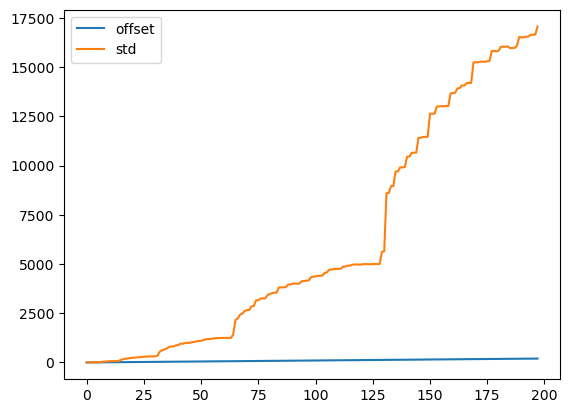

In [25]:
result_df_mma.plot()

## Hilbert Multiplier

### Symmetric

In [41]:
result_data=[]
for i in range(2,1000):
    std = get_std_with_different_multiplier(df,'A','B','hilbert',i,i)
    # print('offset: '+str(i)+', std is: '+str(std) )
    result_data.append([i,std])
    if std==0:
        print('Found the offset that reject null hypothesis: '+str(i))
        break
result_df_hms=pd.DataFrame(result_data,columns=['offset','std'])
result_df_hms

KeyboardInterrupt: 

### Asymmetric

In [35]:
result_data=[]
for i in range(2,1000):
    std = get_std_with_different_multiplier(df,'A','B','hilbert',1,i)
    # print('offset: '+str(i)+', std is: '+str(std) )
    result_data.append([i,std])
    if std==0:
        print('Found the offset that reject null hypothesis: '+str(i))
        break
result_df_hma=pd.DataFrame(result_data,columns=['offset','std'])
result_df_hma

,offset,std
0,2,3.726795
1,3,5.547382
2,4,6.663915
3,5,40.743337
4,6,54.502981
...,...,...
193,195,23934.141059
194,196,23802.984987
195,197,23806.207485
196,198,23810.343510
